In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


In [2]:
device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda")
print(device)

cpu


## Data Loading

In [3]:
import torchvision
from torchvision.datasets import MNIST
from torchvision import transforms

# Transformation applied on each image
transform = transforms.Compose([transforms.Resize((32,32)), transforms.ToTensor()])

train_dataset = MNIST(root='./MNIST', train=True, transform = None, download=True)

c:\Users\nguye\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
X = []
for k in range(60000):
    X.append(np.array(train_dataset[k][0]))
X = np.array(X)

In [5]:
N = X.shape[0]

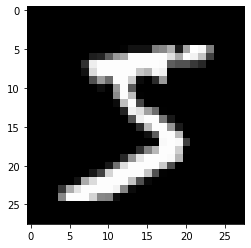

In [6]:
plt.imshow(X[0], cmap = 'gray')

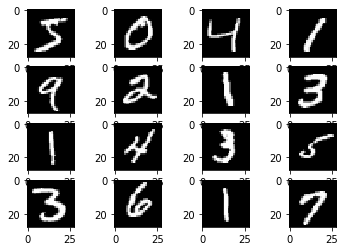

In [7]:
fig, axs = plt.subplots(4,4)
axs = axs.ravel()

for k in range(len(axs)):
    axs[k].imshow(X[k], cmap = 'gray')


## Clustering for MNIST

In [9]:
from sklearn.cluster import KMeans

In [10]:
# N = X.shape[0]
# X_reshaped = X.reshape((N, -1))
# n_clusters = 10

In [11]:
# kmeans = KMeans(n_clusters = n_clusters, n_jobs = -1)
# kmeans.fit(X_reshaped)
# clusters = kmeans.predict(X_reshaped)
# np.save('./Clusters/MNIST10.npy', clusters)

In [12]:
# for n_clusters in [80]:
#     kmeans = KMeans(n_clusters = n_clusters, n_jobs = -1)
#     kmeans.fit(X_reshaped)
#     clusters = kmeans.predict(X_reshaped)
#     np.save('./Clusters/MNIST' + str(n_clusters) + '.npy', clusters)

### Visualize images in the same cluster

In [13]:
np.where(clusters == 1)[0]

NameError: name 'clusters' is not defined

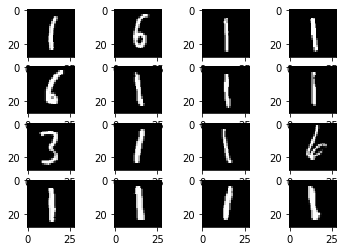

In [ ]:
which_cluster = 1
where = np.where(clusters == which_cluster)[0]

index = np.random.choice(where, size = 16)

fig, axs = plt.subplots(4, 4)
axs = axs.ravel()
for k in range(16):
    axs[k].imshow(X[index[k]], cmap = 'gray')





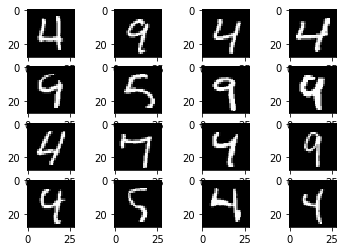

In [ ]:
which_cluster = 2
where = np.where(clusters == which_cluster)[0]

index = np.random.choice(where, size = 16)

fig, axs = plt.subplots(4, 4)
axs = axs.ravel()
for k in range(16):
    axs[k].imshow(X[index[k]], cmap = 'gray')

# Apply Compression Methods

## Single Image Compression

### PNG

In [22]:
path = ".\MNIST\Compressed\png\ " 

for i in range(N):
    cv2.imwrite(path + str(i) + ".png", X[i])



### Get size

In [31]:
size = 0
path = ".\MNIST\Compressed\png\ " 
for f in glob.glob(path + "*.png"):
    size = size + os.path.getsize(f)
# for f in glob.glob(path + "*.npy"):
#     size = size + os.path.getsize(f)

print(size)
np.save("./Saved_datas/MNIST_png_size.npy", size)

20547072


## Loading the Clusters

In [7]:
import glob

In [8]:
cluster_path = "./Clusters/MNIST*.npy"   # Path to all .npy files
clusters_dict = {}
for f in glob.glob(cluster_path):
    clusters_dict[f[11:18]] = np.load(f)

clusters_dict

{'MNIST10': array([57, 37, 87, ..., 28, 21, 94]),
 'MNIST15': array([ 1,  8,  5, ...,  2, 11, 12]),
 'MNIST20': array([17, 11, 13, ..., 10,  6,  8]),
 'MNIST25': array([ 6,  8, 14, ...,  6,  7, 10]),
 'MNIST30': array([25,  7, 16, ..., 25, 17, 15]),
 'MNIST35': array([19,  6, 23, ..., 19, 29,  0]),
 'MNIST40': array([17, 39, 38, ..., 17, 16, 23]),
 'MNIST45': array([17, 22, 32, ..., 31,  0, 16]),
 'MNIST50': array([31, 21, 43, ..., 29, 27, 36]),
 'MNIST55': array([10, 44, 51, ..., 30, 12, 21]),
 'MNIST60': array([48, 50,  5, ..., 26, 14, 52]),
 'MNIST65': array([23,  6, 63, ..., 44,  4, 30]),
 'MNIST70': array([17, 65, 59, ..., 17, 44, 35]),
 'MNIST75': array([16, 66, 50, ..., 26, 44, 33]),
 'MNIST80': array([63,  6, 74, ..., 25, 50, 31]),
 'MNIST85': array([44, 49, 63, ..., 44, 22, 21]),
 'MNIST90': array([52, 39, 46, ..., 52, 21, 75]),
 'MNIST95': array([23, 59, 67, ..., 88,  4,  2])}

## Median Method

In [9]:
from compression_mnist import Median_Encoder, Median_Decoder

#### Visualization examples

In [10]:
X_compressed = np.copy(X)
median_list = []
n_clusters = 80
clusters = clusters_dict['MNIST' + str(n_clusters)]
for which_cluster in range(n_clusters):
    where = np.where(clusters == which_cluster)[0]
    image_set = X[where].copy()
    image_set_compressed, set_median = Median_Encoder(image_set)
    X_compressed[where] = image_set_compressed
    median_list.append(set_median.squeeze())

median_list = np.array(median_list)




In [11]:
median_list.shape

(80, 28, 28)

In [12]:
which_cluster = 1
where = np.where(clusters == which_cluster)[0]

index = np.random.choice(where, size = 16)

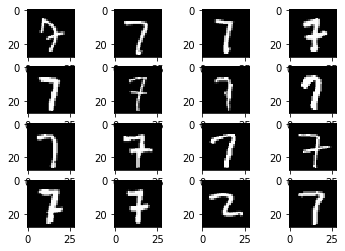

In [13]:
fig, axs = plt.subplots(4, 4)
axs = axs.ravel()
for k in range(16):
    axs[k].imshow(X[index[k]], cmap = 'gray')

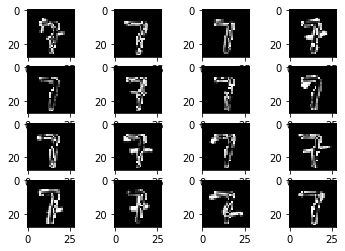

In [14]:
fig, axs = plt.subplots(4, 4)
axs = axs.ravel()
for k in range(16):
    axs[k].imshow(X_compressed[index[k]], cmap = 'gray')

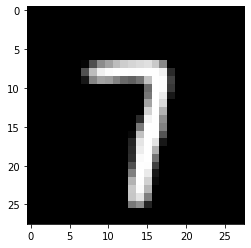

In [15]:
plt.imshow(median_list[1], cmap = 'gray')

### Median Method with PNG Compression 

####  Prepare the directories for saving the compressed images

In [16]:
for name, cluster in clusters_dict.items():
    print(name)
    for value in np.unique(cluster):

        path = ".\MNIST\Compressed\median_png\ " + name  + "\ "

        if os.path.exists(path):
            # os.rmdir(path)
            files = glob.glob(path + '*')
            for f in files:
                os.remove(f)
        else:
            os.mkdir(path)

MNIST10
MNIST15
MNIST20
MNIST25
MNIST30
MNIST35
MNIST40
MNIST45
MNIST50
MNIST55
MNIST60
MNIST65
MNIST70
MNIST75
MNIST80
MNIST85
MNIST90
MNIST95


In [17]:
N = X.shape[0]

In [18]:
# Loop over number of clusters
for name, clusters in clusters_dict.items():
    print(name)

    X_compressed_median = np.copy(X)
    median_img_list = []
    # Loop over each cluster
    for value in np.unique(clusters):
        where = np.where(clusters == value)[0]
        image_set = X[where].copy()
        compressed_set, median_img = Median_Encoder(image_set)
        X_compressed_median[where] = compressed_set
        median_img_list.append(median_img.squeeze())


    path = ".\MNIST\Compressed\median_png\ " + name  + "\ "
    # print(path)
    # print(X_compressed_median.shape)
    # Loop over images 
    for i in range(N):
        cv2.imwrite(path + str(i) + ".png", X_compressed_median[i])
    

    n_clusters = len(np.unique(clusters))
    median_img_list = np.array(median_img_list)
    for i in range(n_clusters):
        cv2.imwrite(path + "median" + str(i) + ".png", median_img_list[i])



MNIST10
MNIST15
MNIST20
MNIST25
MNIST30
MNIST35
MNIST40
MNIST45
MNIST50
MNIST55
MNIST60
MNIST65
MNIST70
MNIST75
MNIST80
MNIST85
MNIST90
MNIST95


### Getting the size of compressed images

In [25]:
for name in clusters_dict:
    path = ".\MNIST\Compressed\median_png\ " + name  + "\ "

    size = 0
    for f in glob.glob(path + "*.png"):
        size = size + os.path.getsize(f)
    # for f in glob.glob(path + "*.npy"):
    #     size = size + os.path.getsize(f)
    
    print(size)
    np.save("./Saved_datas/" + name + "median_png_size.npy", size)

24152459
24775250
24665742
24612671
24499123
24461931
24395656
24322494
24311208
24287499
24247441
24245712
24220581
24213488
24204215
24163233
24196973
24184888


## Delta Method

In [26]:
from compression_mnist import Delta_Encoder

In [27]:
X_delta = np.copy(X)
X_delta = Delta_Encoder(X_delta)


In [39]:
path = ".\MNIST\Compressed\ " 

# for i in range(N):
    # cv2.imwrite(path + str(i) + ".npy", X_delta[i])
np.save(path + "X.npy", X)


In [40]:
size = 0
path = ".\MNIST\Compressed\ " 
for f in glob.glob(path + "*.npy"):
    size = size + os.path.getsize(f)
# for f in glob.glob(path + "*.npy"):
#     size = size + os.path.getsize(f)

print(size)
np.save("./Saved_datas/MNIST_npy_size.npy", size)

47040128


## Min-Max Differential

In [41]:
from compression_mnist import MMD_Encoder_Flatten, MMD_Decoder_Flatten

####  Prepare the directories for saving the compressed images

In [43]:
for name, cluster in clusters_dict.items():
    print(name)
    for value in np.unique(cluster):

        path = ".\MNIST\Compressed\mmd_png\ " + name  + "\ "

        if os.path.exists(path):
            # os.rmdir(path)
            files = glob.glob(path + '*')
            for f in files:
                os.remove(f)
        else:
            os.mkdir(path)

MNIST10
MNIST15
MNIST20
MNIST25
MNIST30
MNIST35
MNIST40
MNIST45
MNIST50
MNIST55
MNIST60
MNIST65
MNIST70
MNIST75
MNIST80
MNIST85
MNIST90
MNIST95


In [45]:
Y, mi, ma = MMD_Encoder_Flatten(X)

In [47]:
Y.shape

(60000, 28, 28)

In [48]:

# Loop over number of clusters
for name, clusters in clusters_dict.items():
    print(name)

    X_mmd = np.copy(X)
    min_img_list = []
    max_img_list = []
    # Loop over each cluster
    for value in np.unique(clusters):
        where = np.where(clusters == value)[0]
        image_set = X[where].copy()
        compressed_set, min_img, max_img = MMD_Encoder_Flatten(image_set)
        X_mmd[where] = compressed_set
        min_img_list.append(min_img.squeeze())
        max_img_list.append(max_img.squeeze())


    path = ".\MNIST\Compressed\mmd_png\ " + name  + "\ "
    # print(path)
    # print(X_mmd.shape)
    # Loop over images 
    for i in range(N):
        cv2.imwrite(path + str(i) + ".png", X_mmd[i])
    

    n_clusters = len(np.unique(clusters))
    min_img_list = np.array(min_img_list)
    max_img_list = np.array(max_img_list)
    for i in range(n_clusters):
        cv2.imwrite(path + "min" + str(i) + ".png", min_img_list[i])
        cv2.imwrite(path + "max" + str(i) + ".png", max_img_list[i])



MNIST10
MNIST15
MNIST20
MNIST25
MNIST30
MNIST35
MNIST40
MNIST45
MNIST50
MNIST55
MNIST60
MNIST65
MNIST70
MNIST75
MNIST80
MNIST85
MNIST90
MNIST95
